In [1]:
import pandas as pd
history_location = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Classification-2/master/data/lending-club-subset.csv'
current_location = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Classification-2/master/data/primaryMarketNotes_browseNotes_1-RETAIL.csv'

history = pd.read_csv(history_location)
history['issue_d'] = pd.to_datetime(history['issue_d'], infer_datetime_format=True)
current = pd.read_csv(current_location)

In [2]:
history['earliest_cr_line'] = pd.to_datetime(history['earliest_cr_line'], infer_datetime_format=True)
history['earliest_cr_line'] = history['issue_d'] - history['earliest_cr_line']
history['earliest_cr_line'] = history['earliest_cr_line'].dt.days

current['earliest_cr_line'] = pd.to_datetime(current['earliest_cr_line'], infer_datetime_format=True)
current['earliest_cr_line'] = pd.Timestamp.today() - current['earliest_cr_line']
current['earliest_cr_line'] = current['earliest_cr_line'].dt.days

history['sec_app_earliest_cr_line'] = pd.to_datetime(history['sec_app_earliest_cr_line'], infer_datetime_format=True, errors='coerce')
history['sec_app_earliest_cr_line'] = history['issue_d'] - history['sec_app_earliest_cr_line']
history['sec_app_earliest_cr_line'] = history['sec_app_earliest_cr_line'].dt.days

current['sec_app_earliest_cr_line'] = pd.to_datetime(current['sec_app_earliest_cr_line'], infer_datetime_format=True, errors='coerce')
current['sec_app_earliest_cr_line'] = pd.Timestamp.today() - current['sec_app_earliest_cr_line']
current['sec_app_earliest_cr_line'] = current['sec_app_earliest_cr_line'].dt.days

history['issue_d_year'] = history['issue_d'].dt.year
history['issue_d_month'] = history['issue_d'].dt.month

current['issue_d_year'] = pd.Timestamp.today().year
current['issue_d_month'] = pd.Timestamp.today().month

In [3]:
history['percent_paid'] = history['total_pymnt'] / history['funded_amnt']

In [4]:
target = 'loan_status'
X = history.drop(columns=target)
y = history[target]

In [5]:
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=20000,
                                                         stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=20000,
                                                 stratify=y_trainval)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((88334, 152), (88334,), (20000, 152), (20000,), (20000, 152), (20000,))

In [6]:
cols = ['id', 'issue_d', 'grade', 'percent_paid', 'term', 'int_rate']
result_train = X_train[cols].copy()
result_val = X_val[cols].copy()
result_test = X_test[cols].copy()

result_val.head()

,id,issue_d,grade,percent_paid,term,int_rate
73165,99554097.0,2017-03-01,C,1.291302,60 months,15.99%
74002,58882246.0,2015-08-01,B,0.642948,36 months,9.99%
56284,16201571.0,2014-05-01,B,1.122960,36 months,11.67%
1297,50054024.0,2015-05-01,C,1.308606,60 months,12.69%
70184,50587136.0,2015-06-01,C,1.059445,36 months,13.33%


In [7]:
common_columns = set(history.columns) & set(current.columns)
just_history = set(history.columns) - set(current.columns)
just_current = set(current.columns) - set(history.columns)

In [8]:
features = list(common_columns)
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

In [9]:
# Looking to find new features
pd.options.display.max_columns = 200
X_train.head()

,acc_now_delinq,url,tot_coll_amt,inq_fi,sec_app_earliest_cr_line,sec_app_chargeoff_within_12_mths,earliest_cr_line,issue_d_month,all_util,tot_cur_bal,total_rev_hi_lim,member_id,mo_sin_old_rev_tl_op,sec_app_fico_range_high,total_bal_ex_mort,open_acc,sec_app_fico_range_low,sec_app_revol_util,title,num_bc_sats,pub_rec_bankruptcies,mths_since_rcnt_il,num_accts_ever_120_pd,open_il_12m,inq_last_12m,percent_bc_gt_75,open_act_il,delinq_amnt,mths_since_recent_bc_dlq,sec_app_inq_last_6mths,fico_range_high,emp_length,sec_app_open_act_il,sec_app_open_acc,num_rev_tl_bal_gt_0,max_bal_bc,pub_rec,funded_amnt,open_rv_24m,inq_last_6mths,term,grade,issue_d_year,il_util,id,num_actv_bc_tl,home_ownership,mo_sin_rcnt_tl,sec_app_num_rev_accts,annual_inc_joint,mo_sin_old_il_acct,zip_code,total_bal_il,mths_since_recent_inq,sec_app_mths_since_last_major_derog,revol_bal,sec_app_collections_12_mths_ex_med,collections_12_mths_ex_med,num_rev_accts,purpose,chargeoff_within_12_mths,application_type,num_actv_rev_tl,mths_since_last_major_derog,tot_hi_cred_lim,sec_app_mort_acc,num_tl_120dpd_2m,total_cu_tl,fico_range_low,mo_sin_rcnt_rev_tl_op,acc_open_past_24mths,num_tl_90g_dpd_24m,num_op_rev_tl,open_acc_6m,int_rate,open_rv_12m,bc_util,revol_util,num_bc_tl,num_tl_30dpd,annual_inc,bc_open_to_buy,dti,loan_amnt,num_il_tl,mths_since_recent_bc,mort_acc,dti_joint,mths_since_last_record,total_bc_limit,desc,open_il_24m,sub_grade,initial_list_status,avg_cur_bal,revol_bal_joint,total_il_high_credit_limit,total_acc,delinq_2yrs,mths_since_last_delinq,mths_since_recent_revol_delinq,num_sats,addr_state,num_tl_op_past_12m,pct_tl_nvr_dlq,tax_liens,emp_title,installment
79323,0.0,https://lendingclub.com/browse/loanDetail.acti...,0.0,0.0,NaN,NaN,4964,2,65.0,217521.0,11300.0,NaN,72.0,NaN,7373.0,5.0,NaN,NaN,Credit card refinancing,2.0,0.0,163.0,0.0,0.0,1.0,50.0,0.0,0.0,NaN,NaN,689.0,NaN,NaN,NaN,3.0,4059.0,0.0,4100.0,3.0,0.0,36 months,C,2017,NaN,97581631.0,2.0,MORTGAGE,1.0,NaN,NaN,163.0,321xx,0.0,11.0,NaN,7373.0,NaN,0.0,6.0,credit_card,0.0,Individual,3.0,NaN,224098.0,NaN,0.0,1.0,685.0,1.0,4.0,0.0,4.0,1.0,13.99%,2.0,90.3,65.2%,4.0,0.0,26904.0,464.0,9.77,4100.0,1.0,51.0,5.0,NaN,NaN,4800.0,NaN,0.0,C3,f,43504.0,NaN,0.0,12.0,0.0,NaN,NaN,5.0,FL,3.0,100.0,0.0,NaN,140.11
114354,0.0,https://lendingclub.com/browse/loanDetail.acti...,0.0,NaN,NaN,NaN,7640,11,NaN,155868.0,24500.0,NaN,251.0,NaN,73853.0,9.0,NaN,NaN,Debt consolidation,5.0,0.0,NaN,0.0,NaN,NaN,40.0,NaN,0.0,NaN,NaN,734.0,10+ years,NaN,NaN,5.0,NaN,0.0,18000.0,NaN,0.0,36 months,A,2014,NaN,35104045.0,5.0,MORTGAGE,11.0,NaN,NaN,157.0,462xx,NaN,19.0,NaN,12017.0,NaN,0.0,18.0,debt_consolidation,0.0,Individual,5.0,NaN,208920.0,NaN,0.0,NaN,730.0,11.0,3.0,0.0,5.0,NaN,6.99%,NaN,49.0,49%,17.0,0.0,80000.0,12483.0,21.48,18000.0,17.0,11.0,1.0,NaN,NaN,24500.0,NaN,NaN,A3,w,17319.0,NaN,80420.0,36.0,0.0,NaN,NaN,9.0,IN,2.0,100.0,0.0,Asst Vice President,555.71
81318,0.0,https://lendingclub.com/browse/loanDetail.acti...,367.0,0.0,NaN,NaN,11627,8,54.0,31812.0,40101.0,NaN,381.0,NaN,31812.0,11.0,NaN,NaN,Credit card refinancing,8.0,0.0,2.0,1.0,1.0,0.0,50.0,1.0,0.0,NaN,NaN,669.0,2 years,NaN,NaN,8.0,8572.0,0.0,24000.0,7.0,0.0,60 months,D,2017,95.0,114023628.0,8.0,RENT,2.0,NaN,NaN,2.0,908xx,10193.0,13.0,NaN,21619.0,NaN,0.0,12.0,credit_card,0.0,Individual,10.0,42.0,50801.0,NaN,NaN,1.0,665.0,4.0,8.0,0.0,10.0,2.0,17.09%,3.0,56.0,54%,8.0,0.0,80000.0,4613.0,13.37,24000.0,1.0,7.0,0.0,NaN,NaN,36901.0,NaN,1.0,D1,w,2892.0,NaN,10700.0,15.0,0.0,NaN,NaN,11.0,CA,4.0,93.0,0.0,Home Loan Officer,597.63
5784,0.0,https://lendingclub.com/browse/loanDetail.acti...,0.0,NaN,NaN,NaN,2131,5,NaN,113626.0,15500.0,NaN,52.0,NaN,10544.0,10.0,NaN,NaN,Other,4.0,0.0,NaN,0.0,NaN,NaN,75.0,NaN,0.0,NaN,NaN,664.0,2 years,NaN,NaN,4.0,NaN,0.0,7375.0,NaN,0.0,36 months,D,2013,NaN,4225655.0,3.0,MORTGAGE,3.0,NaN,NaN,70.0,330xx,NaN,8.0,NaN,9644.0,NaN,0.0,10.0,other,0.0,Individual,4.0,NaN,132031.0,NaN,0.0,NaN,660.0,3.0,6.0,0.0,8.0,NaN,17.77%,NaN,71.3,62.2%,4.0,0.0,45000.0,2580.0,15.84,7375.0,1.0,3.0,1.0,NaN,N

In [10]:
X_train['emp_title'].value_counts()

Teacher                                1446
Manager                                1269
Owner                                   701
RN                                      627
Registered Nurse                        593
Supervisor                              553
Sales                                   517
Driver                                  491
Project Manager                         405
Office Manager                          372
General Manager                         355
Director                                352
owner                                   291
manager                                 288
Engineer                                278
Vice President                          271
teacher                                 269
President                               257
Operations Manager                      224
Accountant                              224
Attorney                                217
Account Manager                         212
driver                          

In [11]:
def wrangle(df):
    df = df.copy()
    
    for col in df:
        df[col+'_NULL'] = df[col].isnull()
        
    df['int_rate'] = df['int_rate'].str.strip('%').astype(float)
    df['revol_util'] = df['revol_util'].str.strip('%').astype(float)
    
    df['emp_length'] = df['emp_length'].str.replace(r'\D','').astype(float)
    
    df['emp_title'] = df['emp_title'].str.lower()
    df['emp_title_manager'] = df['emp_title'].str.contains('manager', na=False)
    df['emp_title_teacher'] = df['emp_title'].str.contains('teacher', na=False)
    df['emp_title_owner'] = df['emp_title'].str.contains('owner', na=False)
    
    df['title'] = df['title'].str.len()
    df['desc'] = df['desc'].str.len()
    df['emp_title'] = df['emp_title'].str.len()
    
    sub_grade_ranks = {'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5, 'B1': 6, 'B2': 7, 
                       'B3': 8, 'B4': 9, 'B5': 10, 'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 
                       'C5': 15, 'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20}
    df['sub_grade'] = df['sub_grade'].map(sub_grade_ranks)
    
    df = df.drop(columns='id')
    df = df.drop(columns='url')
    df = df.drop(columns='member_id')
    df = df.drop(columns='grade')
    df = df.drop(columns='zip_code')
    
    features = ['acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 
                'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 
                'collections_12_mths_ex_med', 'delinq_amnt', 'desc_NULL', 'dti', 
                'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_length_NULL', 
                'emp_title', 'emp_title_NULL', 'emp_title_owner', 'fico_range_high', 
                'funded_amnt', 'home_ownership', 'inq_last_12m', 'inq_last_6mths', 
                'installment', 'int_rate', 'issue_d_month', 'issue_d_year', 'loan_amnt', 
                'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
                'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'mths_since_last_major_derog_NULL', 
                'mths_since_last_record', 'mths_since_recent_bc', 'mths_since_recent_inq', 
                'num_actv_bc_tl', 'num_actv_rev_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 
                'num_tl_120dpd_2m_NULL', 'open_rv_12m_NULL', 'open_rv_24m', 
                'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'purpose', 
                'revol_bal', 'revol_bal_joint', 'sec_app_earliest_cr_line', 
                'sec_app_fico_range_high', 'sec_app_open_acc', 'sec_app_open_act_il', 
                'sub_grade', 'term', 'title', 'title_NULL', 'tot_coll_amt', 
                'tot_hi_cred_lim', 'total_acc', 'total_bal_il', 'total_bc_limit', 
                'total_cu_tl', 'total_rev_hi_lim']    
    
    df = df[features]
    
    return df

In [12]:
X_train = wrangle(X_train)
X_val = wrangle(X_val)
X_test = wrangle(X_test)

X_train.shape, X_val.shape, X_test.shape

((88334, 66), (20000, 66), (20000, 66))

In [13]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(ce.OrdinalEncoder(), SimpleImputer(strategy='median'))
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train),
           (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=2000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', early_stopping_rounds=15)

[0]	validation_0-auc:0.667376	validation_1-auc:0.666216
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 15 rounds.
[1]	validation_0-auc:0.672776	validation_1-auc:0.673048
[2]	validation_0-auc:0.676549	validation_1-auc:0.676065
[3]	validation_0-auc:0.679363	validation_1-auc:0.679276
[4]	validation_0-auc:0.680716	validation_1-auc:0.680705
[5]	validation_0-auc:0.682417	validation_1-auc:0.682352
[6]	validation_0-auc:0.683064	validation_1-auc:0.683595
[7]	validation_0-auc:0.683919	validation_1-auc:0.684685
[8]	validation_0-auc:0.685131	validation_1-auc:0.685307
[9]	validation_0-auc:0.6853	validation_1-auc:0.685426
[10]	validation_0-auc:0.685444	validation_1-auc:0.685517
[11]	validation_0-auc:0.685684	validation_1-auc:0.685905
[12]	validation_0-auc:0.686678	validation_1-auc:0.68669
[13]	validation_0-auc:0.686781	validation_1-auc:0.686706
[14]	validation_0-auc:0.687158	validation_1-auc:0.687276
[

[142]	validation_0-auc:0.728805	validation_1-auc:0.717259
[143]	validation_0-auc:0.729006	validation_1-auc:0.717417
[144]	validation_0-auc:0.729125	validation_1-auc:0.717399
[145]	validation_0-auc:0.729203	validation_1-auc:0.717456
[146]	validation_0-auc:0.72931	validation_1-auc:0.717461
[147]	validation_0-auc:0.729439	validation_1-auc:0.717507
[148]	validation_0-auc:0.729531	validation_1-auc:0.717596
[149]	validation_0-auc:0.729684	validation_1-auc:0.717646
[150]	validation_0-auc:0.729852	validation_1-auc:0.717628
[151]	validation_0-auc:0.730087	validation_1-auc:0.717719
[152]	validation_0-auc:0.730249	validation_1-auc:0.717804
[153]	validation_0-auc:0.730345	validation_1-auc:0.717779
[154]	validation_0-auc:0.730516	validation_1-auc:0.717815
[155]	validation_0-auc:0.730678	validation_1-auc:0.717847
[156]	validation_0-auc:0.730783	validation_1-auc:0.717871
[157]	validation_0-auc:0.730929	validation_1-auc:0.717847
[158]	validation_0-auc:0.731002	validation_1-auc:0.717901
[159]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

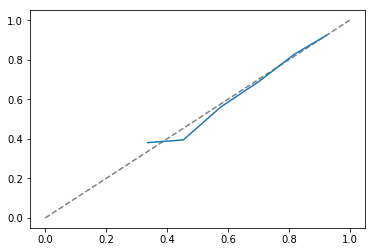

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
y_pred_proba = model.predict_proba(X_val_processed)[:, 1]
prob_true, prob_pred = calibration_curve(y_val, y_pred_proba, n_bins=8)
plt.plot((0,1), (0,1), linestyle='--', color='grey')
plt.plot(prob_pred, prob_true);

In [15]:
def get_results(result_df, y_true, y_pred_proba):
#     from copy import copy
    
    result_df = result_df.copy()
    result_df['loan_status'] = y_true
    result_df['pred_proba'] = y_pred_proba
    result_df['int_rate'] = result_df['int_rate'].str.strip('%').astype(float)
    result_df['term'] = result_df['term'].str.replace(r'\D', '').astype(int)
    result_df['max_interest'] = result_df['int_rate'] * result_df['term'] / 12
    result_df['best_case'] = 25 + result_df['max_interest']/100 * 25
    result_df['worst_case'] = -25
    result_df['expected_value'] = (result_df['pred_proba'] * result_df['best_case']
                                  + (1-result_df['pred_proba']) * result_df['worst_case'])
    return result_df

result_val = get_results(result_val, y_val, y_pred_proba)

In [16]:
result_val.head()

,id,issue_d,grade,percent_paid,term,int_rate,loan_status,pred_proba,max_interest,best_case,worst_case,expected_value
73165,99554097.0,2017-03-01,C,1.291302,60,15.99,Fully Paid,0.627474,79.95,44.9875,-25,18.915320
74002,58882246.0,2015-08-01,B,0.642948,36,9.99,Charged Off,0.867018,29.97,32.4925,-25,24.847028
56284,16201571.0,2014-05-01,B,1.122960,36,11.67,Fully Paid,0.901163,35.01,33.7525,-25,27.945606
1297,50054024.0,2015-05-01,C,1.308606,60,12.69,Fully Paid,0.598308,63.45,40.8625,-25,14.406043
70184,50587136.0,2015-06-01,C,1.059445,36,13.33,Fully Paid,0.726023,39.99,34.9975,-25,18.559573


In [17]:
result_val.describe()

,id,percent_paid,term,int_rate,pred_proba,max_interest,best_case,worst_case,expected_value
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,5.936908e+07,1.041223,40.742400,12.200483,0.824600,42.317505,35.579376,-25.0,24.569687
std,3.947393e+07,0.269617,9.556768,3.715741,0.110737,19.128311,4.782078,0.0,4.938253
min,1.123230e+05,0.000000,36.000000,5.310000,0.267083,15.930000,28.982500,-25.0,-7.011819
25%,2.245412e+07,1.044156,36.000000,9.170000,0.761510,28.320000,32.080000,-25.0,22.355424
50%,6.095365e+07,1.114338,36.000000,12.120000,0.846898,38.220000,34.555000,-25.0,25.834242
75%,8.816367e+07,1.182174,36.000000,14.650000,0.909990,50.970000,37.742500,-25.0,27.707981
max,1.493520e+08,1.596477,60.000000,28.800000,0.992568,144.000000,61.000000,-25.0,52.256198


In [18]:
%matplotlib inline
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
import seaborn as sns
from tqdm import tnrange

def simulate(df, n_picks=40, n_sims=10000, grades=['A', 'B', 'C', 'D'],
            start_date='2007-07-01', end_date='2019-03-01',
            min_expected_value=-25):
    condition = ((df['grade'].isin(grades)) &
                (df['issue_d'] >= start_date) &
                (df['issue_d'] <= end_date) &
                (df['expected_value'] >= min_expected_value))
    possible = df[condition]
    
    simulations = []
    for _ in tnrange(n_sims):
        picks = possible.sample(n_picks).copy()
        picks['paid'] = 25 * picks['percent_paid']
        paid = picks['paid'].sum()
        simulations.append(paid)
        
    simulations = pd.Series(simulations)
    sns.distplot(simulations)
    plt.axvline(x=1000)
    percent = percentileofscore(simulations, 1000)
    print(simulations.describe().to_string())
    plt.title(f'{percent}% of simulations did not profit')


count    10000.000000
mean      1041.369049
std         42.923324
min        875.828428
25%       1013.609389
50%       1043.316662
75%       1072.058207
max       1166.550762


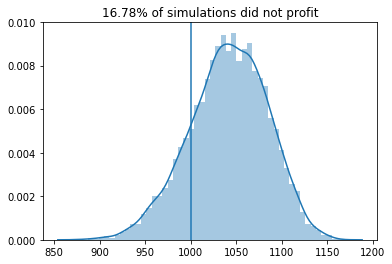

In [19]:
simulate(result_val)


count    10000.000000
mean      1053.735924
std         35.700365
min        905.009287
25%       1030.912362
50%       1056.530402
75%       1079.347944
max       1150.678599


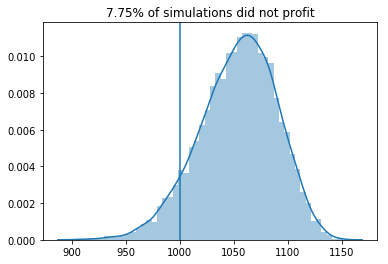

In [20]:
simulate(result_val, grades=['B'])


count    10000.000000
mean      1055.066703
std         35.756229
min        891.845948
25%       1032.229184
50%       1057.680004
75%       1080.189561
max       1154.271354


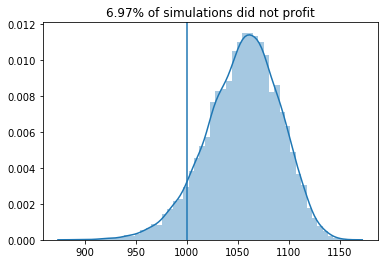

In [21]:
simulate(result_val, grades=['B'])


count    10000.000000
mean      1031.184839
std         48.496030
min        773.648723
25%        999.576166
50%       1033.234993
75%       1065.000309
max       1185.331356


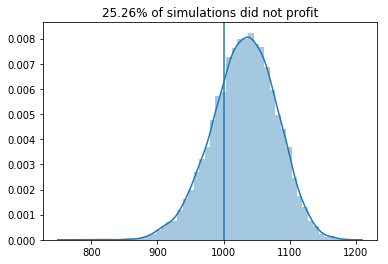

In [22]:
simulate(result_val, grades=['C'])


count    10000.000000
mean      1028.296384
std         53.456145
min        809.111476
25%        993.125549
50%       1029.736079
75%       1065.125520
max       1208.392729


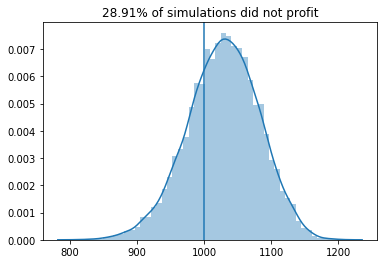

In [23]:
# Doing Shaply
import numpy as np

result_test = get_results(result_test, y_test, y_pred_proba)
min_expected_value = np.percentile(result_test['expected_value'], 80)
simulate(result_test, min_expected_value=min_expected_value)

In [24]:
df = result_test.copy()
condition = (df['expected_value'] >= min_expected_value)
possible = df[condition]
picks = possible.sample(40).copy()
picks

,id,issue_d,grade,percent_paid,term,int_rate,loan_status,pred_proba,max_interest,best_case,worst_case,expected_value
9865,107367963.0,2017-05-01,D,1.114362,36,18.99,Fully Paid,0.977644,56.97,39.2425,-25,37.806266
9903,47250568.0,2015-05-01,C,1.173520,60,14.65,Fully Paid,0.835087,73.25,43.3125,-25,32.046857
33261,94026639.0,2016-12-01,B,1.161515,36,11.39,Fully Paid,0.973258,34.17,33.5425,-25,31.976975
63444,33141583.0,2014-11-01,D,1.315144,60,17.14,Fully Paid,0.910283,85.70,46.4250,-25,40.016948
81439,12707314.0,2014-03-01,C,1.123428,36,15.61,Fully Paid,0.940336,46.83,36.7075,-25,33.025798
123473,10595880.0,2014-01-01,D,0.395236,60,18.25,Charged Off,0.786730,91.25,47.8125,-25,32.283799
100189,126419669.0,2018-01-01,D,1.270465,60,21.45,Fully Paid,0.864018,107.25,51.8125,-25,41.367348
32297,43295299.0,2015-03-01,C,1.287637,60,13.99,Fully Paid,0.975821,69.95,42.4875,-25,40.855717
64156,75358815.0,2016-03-01,C,1.187879,60,11.99,Fully Paid,0.932303,59.95,39.9875,-25,35.588015
42195,102372427.0,2017-03-01,D,1.016473,60,16.99,Fully Paid,0.896195,84.95,46.2375,-25,38.842682


In [25]:
data_for_prediction = X_test[X_test.index==14429]
data_for_prediction

,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,avg_cur_bal,bc_open_to_buy,bc_util,collections_12_mths_ex_med,delinq_amnt,desc_NULL,dti,dti_joint,earliest_cr_line,emp_length,emp_length_NULL,emp_title,emp_title_NULL,emp_title_owner,fico_range_high,funded_amnt,home_ownership,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d_month,issue_d_year,loan_amnt,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,mths_since_last_major_derog_NULL,mths_since_last_record,mths_since_recent_bc,mths_since_recent_inq,num_actv_bc_tl,num_actv_rev_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_tl_120dpd_2m_NULL,open_rv_12m_NULL,open_rv_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,purpose,revol_bal,revol_bal_joint,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_open_acc,sec_app_open_act_il,sub_grade,term,title,title_NULL,tot_coll_amt,tot_hi_cred_lim,total_acc,total_bal_il,total_bc_limit,total_cu_tl,total_rev_hi_lim
14429,4.0,IL,45.0,64000.0,NaN,423.0,26.0,94.8,0.0,0.0,True,3.94,NaN,4839,NaN,True,NaN,True,False,689.0,4000.0,MORTGAGE,5.0,1.0,130.0,10.49,4,2017,4000.0,474.0,131.0,159.0,15.0,1.0,True,NaN,19.0,5.0,1.0,6.0,6.0,6.0,False,False,4.0,75.0,100.0,0.0,debt_consolidation,2540.0,NaN,NaN,NaN,NaN,NaN,7,36 months,18.0,False,0.0,5600.0,14.0,0.0,500.0,0.0,5600.0


In [27]:
data_for_prediction_processed = processor.transform(data_for_prediction)
data_for_prediction_processed = pd.DataFrame(data_for_prediction_processed)
data_for_prediction_processed.columns = data_for_prediction.columns

In [29]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data_for_prediction_processed)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction_processed)

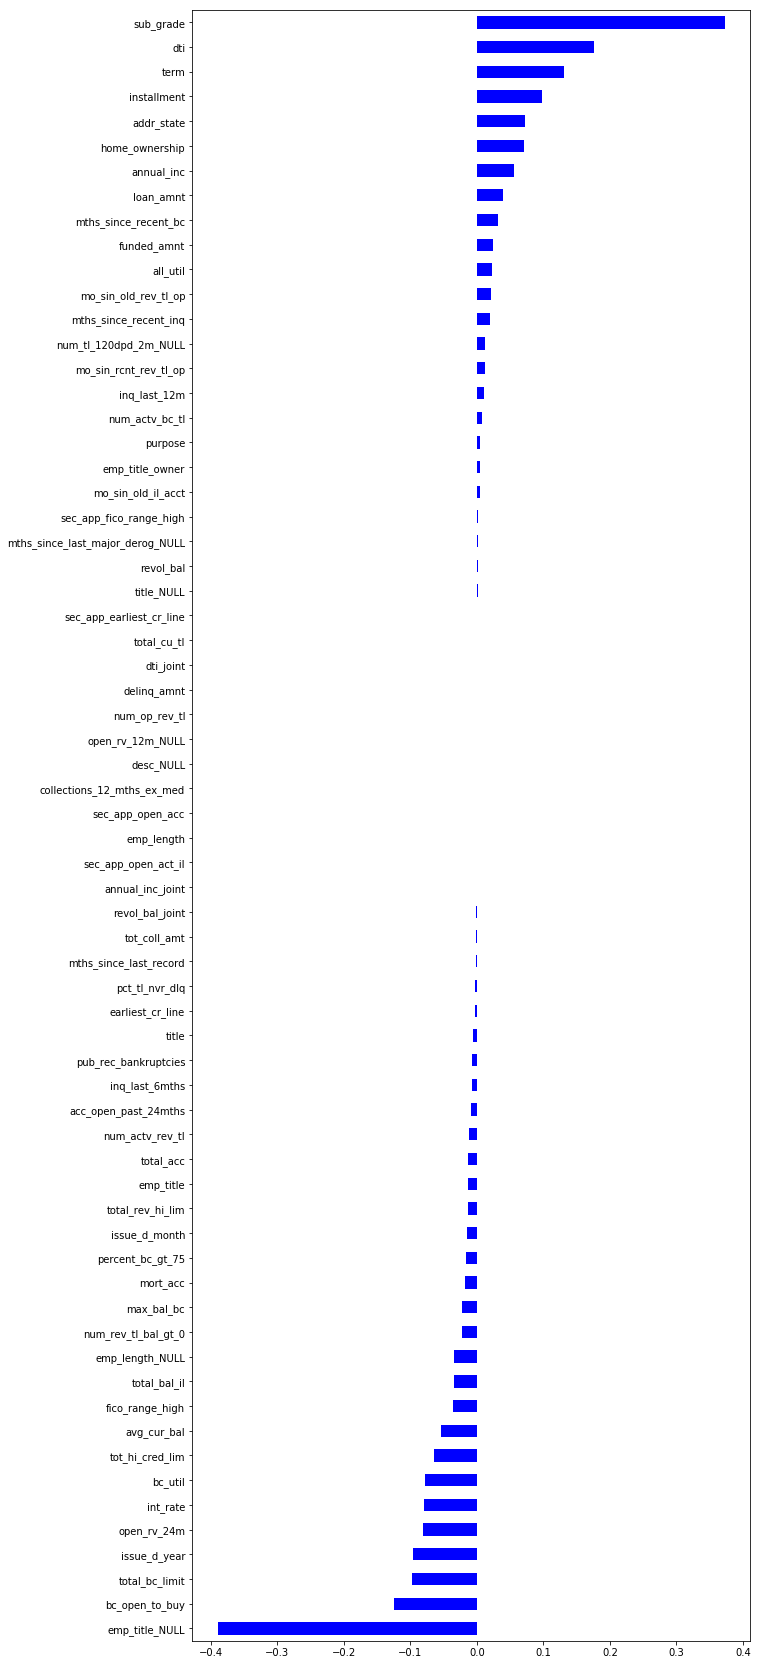

In [30]:
plt.figure(figsize=(10,30))
pd.Series(shap_values[0], X_test.columns).sort_values().plot.barh(color='blue')